# Imports

In [1]:
%matplotlib inline

import pandas as pd # to manage data frames and reading csv files
import numpy as np
#for the sigmoid function we need expit() from scipy
import scipy.special
#library for plotting arrays
import matplotlib.pyplot as plt
# A particularly interesting backend, provided by IPython, is the inline backend. 
# This is available only for the Jupyter Notebook and the Jupyter QtConsole. 
# It can be invoked as follows: %matplotlib inline
# With this backend, the output of plotting commands is displayed inline 
# within frontends like the Jupyter notebook, directly below the code cell that produced it. 
# The resulting plots are inside this notebook, not an external window.
import seaborn as sns
sns.set_style("darkgrid")

import os
# helper to load data from PNG image files# helpe 
import imageio
# glob helps select multiple files using patterns
import glob

import operator

# Rotating Images

In [2]:
def rotate_image(inputs, degree):
  
    ## create rotated variations
    # rotated anticlockwise by x degrees
    inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), degree, cval=0.01, order=1, reshape=False)
    new_inputs1 = inputs_plusx_img.reshape(784)
    # rotated clockwise by x degrees
    #inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -degree, cval=0.01, order=1, reshape=False)
    #new_inputs2 = inputs_minusx_img.reshape(784)
    
    return (new_inputs1)

In [3]:
def rotate_imageCCW(inputs, degree):
  
    ## create rotated variations
    # rotated anticlockwise by x degrees
    #inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), degree, cval=0.01, order=1, reshape=False)
    #new_inputs1 = inputs_plusx_img.reshape(784)
    # rotated clockwise by x degrees
    inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -degree, cval=0.01, order=1, reshape=False)
    new_inputs2 = inputs_minusx_img.reshape(784)
    
    return (new_inputs2)

In [4]:
# preprocess the data directly read from the csv file
# we want to maintain inputs (X) and targets (y) seperatly
def rotate_preprocess_data(X_Train, degree):
    X_Train2= []
    for instance in X_Train:
        output1 = rotate_image(instance, degree)
        X_Train2.append(output1)
        output2 = rotate_imageCCW(instance, degree)
        X_Train2.append(output2)
    pass
    return(X_Train2)

In [5]:
def doubleY(y_train):
    y_Train2= []
    for instance in y_train:
        y_Train2.append(instance)
        y_Train2.append(instance)
    pass

    return(y_Train2)

In [6]:
np.random.seed;

### Load MNIST Data into Frame

#### Load Data

In [7]:
train_file = "mnist_train.csv"
test_file = "mnist_test.csv"

#load the mnist training data CSV file into a frame
df_orig_train = pd.read_csv(train_file, header=None)  # read entire train dataset
df_orig_test = pd.read_csv(test_file, header=None)  # read entire test dataset
#df_orig_train.info()

#### ANN

In [8]:
y_train_all =  pd.get_dummies(df_orig_train[0]).values
X_train_all = df_orig_train.drop(0, axis = 1).values
print(y_train_all.shape)
print(X_train_all.shape)

y_test_all =  pd.get_dummies(df_orig_test[0]).values
X_test_all = df_orig_test.drop(0, axis = 1).values
print(y_test_all.shape)
print(X_test_all.shape)

(60000, 10)
(60000, 784)
(10000, 10)
(10000, 784)


#### kNN

In [9]:
kNN_y_train_all =  df_orig_train[0].values
kNN_X_train_all = df_orig_train.drop(0, axis = 1).values
print(kNN_y_train_all.shape)
print(kNN_X_train_all.shape)

kNN_y_test_all =  df_orig_test[0].values
kNN_X_test_all = df_orig_test.drop(0, axis = 1).values
print(kNN_y_test_all.shape)
print(kNN_X_test_all.shape)

(60000,)
(60000, 784)
(10000,)
(10000, 784)


## Helpers

### Preprocess

In [10]:
# Select smaller samples of the train and test datasets (will execute faster when training our networks than using the entire dataset)
train_sample_size = 1500  # choosing a smaller sample instead of the entire dataset
random_indices = np.random.choice(range(len(y_train_all)), train_sample_size, replace = False)

#### ANN

In [11]:
X_train = X_train_all[random_indices]
y_train = y_train_all[random_indices]
print(y_train.shape)
print(X_train.shape)

#preprocessing steps
X_train = (X_train / 255.0 * 0.99) + 0.01
y_train = y_train + 0.01
y_train = np.where(y_train != 1.01, y_train, 0.99)
print(y_train.shape)

test_sample_size = 100 
random_test_indices = np.random.choice(range(len(y_test_all)), test_sample_size, replace = False)
X_test = X_test_all[random_test_indices]
y_test = y_test_all[random_test_indices]
print(y_test.shape)
print(X_test.shape)

X_test = (X_test / 255.0 * 0.99) + 0.01
y_test = y_test + 0.01
y_test = np.where(y_test != 1.01, y_test, 0.99)
print(y_test.shape)
print(X_test.shape)

(1500, 10)
(1500, 784)
(1500, 10)
(100, 10)
(100, 784)
(100, 10)
(100, 784)


#### kNN

In [12]:
kNN_X_train = kNN_X_train_all[random_indices]
kNN_y_train = kNN_y_train_all[random_indices]
print(kNN_y_train.shape)
print(kNN_X_train.shape)

#preprocessing steps
kNN_X_train = (kNN_X_train / 255.0 * 0.99) + 0.01

test_sample_size = 100 
random_test_indices = np.random.choice(range(len(y_test_all)), test_sample_size, replace = False)
kNN_X_test = kNN_X_test_all[random_test_indices]
kNN_y_test = kNN_y_test_all[random_test_indices]
print(kNN_y_test.shape)
print(kNN_X_test.shape)

kNN_X_test = (kNN_X_test / 255.0 * 0.99) + 0.01
kNN_y_test = kNN_y_test

(1500,)
(1500, 784)
(100,)
(100, 784)


### Evaluation

In [13]:
def mean_squared_error(predictions, targets):
    """
    Calculates mean squared error of a model's predictions.
    """
    N=targets.size
    mse = ((targets - predictions) **2).sum() / (2*N)
    return mse


def accuracy(predictions, targets):
    """
    Calculates the accuracy of a model's predictions.
    """
    prediction_labels = np.argmax(predictions, axis=1)
    target_labels = np.argmax(targets, axis=1)
    predictions_correct = (prediction_labels == target_labels.round())
    accuracy = predictions_correct.mean()
    return accuracy

### Activations

In [14]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def backward(self, inputs):
        self.output = np.greater(inputs, 0).astype(int) # inputs > 0 then convert bools to int
        
class Activation_Sigmoid:
    def forward(self, x):
        return(1 / (1 + np.exp(-x)))
    def backward(self, x):
        return(x * ( 1 - x))

## Class Layer_Dense to build Layers

In [15]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, learningrate=0.01, activation='sigmoid'):
        
        self.weights = np.random.normal(0.0, pow(n_inputs, -0.5), (n_inputs, n_neurons))
        print(self.weights.shape)
        self.biases = np.zeros((1, n_neurons))
       
        self.lr = learningrate
        self.activate=activation  
        
    def forward(self, inputs):
        self.in_values = inputs
        self.layer_input = np.dot(inputs , self.weights) + self.biases
        self.activation()
    
    def activation(self):
        if self.activate == 'sigmoid':
            a = Activation_Sigmoid()
            self.layer_output = a.forward(self.layer_input)
            
           
    def del_activation(self):
        if self.activate == 'sigmoid':
            del_a = Activation_Sigmoid()
            self.del_layer_output =  del_a.backward(del_a.forward(self.layer_input))
      
    def backward(self, delta_in, weights_in, targets=None, output_layer=False):
        self.del_activation()
        if output_layer:
            self.layer_error = self.layer_output - targets
            self.layer_delta = self.layer_error * self.del_layer_output
        else:          
            self.layer_error = np.dot(delta_in, weights_in.T)
            self.layer_delta = self.layer_error * self.del_layer_output
        
    def weight_update(self, prev_layer_output):
        # print("prev_layer_output.T.shape: "+str(prev_layer_output.T.shape))
        # print("self.layer_delta.shape: "+str(self.layer_delta.shape))
        N = self.layer_delta.shape[0]
        weights_update = np.dot(prev_layer_output.T, self.layer_delta) / N
        # print(weights_update.shape)
        self.weights -= self.lr * weights_update
        biases_update = np.mean(self.layer_delta, axis=0, keepdims=True)
        # print("biases_update.shape: "+ str(biases_update.shape))
        # print("self.biases.shape: "+ str(self.biases.shape))
        self.biases -= self.lr * biases_update

## Build ANN Class

In [16]:
class ANN():
    def __init__(self, ouput_layer, hidden_layer, batch_size = 10):
        self.output = ouput_layer
        self.layer1 = hidden_layer
        self.batch_size = batch_size

    def batch_input(self, x, y):
        for i in range(0, len(x), self.batch_size):
            yield (x[i:i + self.batch_size], y[i:i + self.batch_size])

    def train(self, x, y, epochs, lr):
        self.layer1.lr = lr
        self.output.lr = lr

        monitoring = {}
        monitoring['mean_squared_error'] = []
        monitoring['accuracy'] = []

        for epoch in range(epochs):

            for (batch_x, batch_y) in self.batch_input(x, y):
                self.layer1.forward(batch_x)
                # print('layer1 output \n' ,layer1.layer_output.shape)
                self.output.forward(self.layer1.layer_output)
                # print('layer output  \n', output.layer_output.shape)

                # backprop through the layers 
                self.output.backward(None, None, batch_y, True)
                # print('layer out delta  \n', output.layer_delta.shape)
                self.layer1.backward(self.output.layer_delta, self.output.weights)
                # print('layer1 delta  \n', layer1.layer_delta.shape)

                # update all the layer weights
                self.output.weight_update(self.layer1.layer_output)
                # print('layer weights  \n', output.weights.shape)
                self.layer1.weight_update(batch_x)
                # print('layer weights  \n', layer1.weights.shape)
            pred = self.predict(x)
            mse, acc = self.evaluate(pred, y)
            monitoring['mean_squared_error'].append(mse)
            monitoring['accuracy'].append(acc)

        monitoring_df = pd.DataFrame(monitoring)   
        return monitoring_df

    def predict(self, x):
        self.layer1.forward(x)
        self.output.forward(self.layer1.layer_output)
        return self.output.layer_output

    def evaluate(self, predicts, y):
        mse = mean_squared_error(predicts, y)
        acc = accuracy(predicts, y)
        return mse, acc

    def test(self, x, y):
        monitoring = {}
        pred = self.predict(x)
        mse, acc = self.evaluate(pred, y)
        monitoring['mean_squared_error'] = [mse]
        monitoring['accuracy'] = [acc]
        return pd.DataFrame(monitoring)

## Train ANN

### Non Rotated and Rotated Data

In [17]:
np.random.seed(42)

# set other hyperparameters
batch_size = 1
epochs = 10
lr = 0.3

# configure the layers
hidden = Layer_Dense(784,200)
output = Layer_Dense(200,10)



degrees = [0, 10, 30, 60, 120, 180];
rotated_ann_list = []
rotated_train_performance_list = []

accuracy_results_rotate = []

for degree in degrees:
    ann_list_element = []
    
    print(degree)
    rotated_X_Train = []
    rotated_y_Train = []
    rotated_X_Train = rotate_preprocess_data(X_train, degree)

    rotated_y_Train = doubleY(y_train)   
    rotated_X_Train = np.array(rotated_X_Train)
    rotated_y_Train = np.array(rotated_y_Train)
    
    
    # create an ANN model
    ann2 = ANN(output, hidden, batch_size)
    
    # train the ANN model with training data
    train_performance = ann2.train(rotated_X_Train, rotated_y_Train, epochs, lr)
    
    rotated_train_performance_list.append(train_performance)
    rotated_ann_list.append(ann2)
    
    
    df_test_result = ann2.test(X_test, y_test)
    accuracy_results_rotate.append(df_test_result)
    
pass

accuracy_results_individual = []
for result in accuracy_results_rotate:
    mse=result['mean_squared_error'].values
    acc=result['accuracy'].values
    accuracy_results_individual.append(acc)
    print(result)
pass
    



print(accuracy_results_individual)
print ("Mean Squared Error and Accuracy Results \n {}".format(accuracy_results_rotate))

(784, 200)
(200, 10)
0
10
30
60
120
180
   mean_squared_error  accuracy
0            0.007169      0.91
   mean_squared_error  accuracy
0            0.005967       0.9
   mean_squared_error  accuracy
0            0.009553      0.87
   mean_squared_error  accuracy
0            0.032081       0.6
   mean_squared_error  accuracy
0            0.050214      0.29
   mean_squared_error  accuracy
0            0.049777      0.38
[array([0.91]), array([0.9]), array([0.87]), array([0.6]), array([0.29]), array([0.38])]
Mean Squared Error and Accuracy Results 
 [   mean_squared_error  accuracy
0            0.007169      0.91,    mean_squared_error  accuracy
0            0.005967       0.9,    mean_squared_error  accuracy
0            0.009553      0.87,    mean_squared_error  accuracy
0            0.032081       0.6,    mean_squared_error  accuracy
0            0.050214      0.29,    mean_squared_error  accuracy
0            0.049777      0.38]


## Model Results

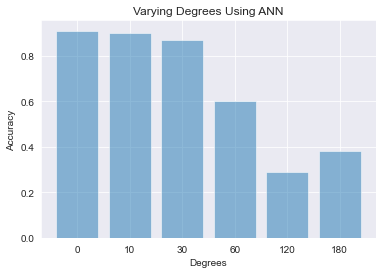

In [18]:
# Objects
objects = degrees

for x in range(len(objects)):
    objects[x] = str(objects[x])


accuracy_results_individual = np.array(accuracy_results_individual)
performance = accuracy_results_individual.flatten()

plt.bar(objects, performance, alpha=0.5)

plt.ylabel('Accuracy')
plt.xlabel('Degrees')

# Graph titles
plt.title('Varying Degrees Using ANN')

# Save Degrees ANN graph
plt.savefig('C:/Users/Craig/OneDrive/Advanced AI/CW1/graphs/degreesANN.png', dpi=300)

plt.show()

## KNN SECTION

## Define Similarity Metrics

In [19]:
#Within our class we now need code for each of the components of k-NN.
#First, let's create a method that will measure the distance between two vectors.
def euclidean(instance1, instance2):
        '''
        Calculates euclidean distance between two instances of data
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        distance = 0
        for val1, val2 in zip(instance1, instance2):            
            distance += pow((val1 - val2), 2)
        
        distance = pow(distance, 1/2)
             
              
        return 1 / (1+ distance)
    

def manhattan(instance1, instance2):
        '''
        Calculates manhattan distance between two instances of data
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        distance = 0
        for val1, val2 in zip(instance1, instance2):
            distance += abs(val1 - val2)      
              
        return 1 / (1+ distance)
    
def dot_product(instance1, instance2):
        '''
        Calculates dot product between two instances 
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        return np.dot(instance1, instance2)
    
def cosine(instance1, instance2):
        cossime = dot(instance1, instance20/(norm(instance1)*norm(instance2)))
        return cossime

## Define Evaluation Metrics

In [20]:
    #Finally, we can test to see how many of the test instances we got correct
    def accuracyknn(results):
        correct = 0
        for predict, target in results:
            
            if predict == target:
                correct += 1
        return (correct/float(len(results))) * 100.0

## Build kNN Class

In [21]:
class kNN:
    """
    Parameters
    X_train, Y_train : list
    these consists of the training set feature values and associated class labels
    k : int
    specify the number of neighbours
    sim : literal
    specify the name of the similarity metric (e.g. manhattan, eucliedean)
    weighted : Boolean
    specify the voting strategy as weighted or not weighted by similarity values
  
    Attributes
    -----------  
    Results : list
      Target and predicted class labels for the test data.    
    """


    def __init__(self, X_train, Y_train, k=1, sim=euclidean, weighted=True):
        self.X_train = X_train
        self.Y_train = Y_train
        
        if k <= len(self.X_train):
            self.k = k # set the k value for neighbourhood size
        else:
            self.k = len(self.X_train) # to ensure the get_neighbours dont crash
    
        self.similarity = sim # specify a sim metric that has been pre-defined e.g. manhattan or euclidean
        
        self.weighted = weighted # boolean to choose between weighted / unweighted majority voting
        
        #store results from testing 
        self.results= []
        
    #With k-NN, we are interested in finding the k number of points with the greatest similarity 
    # to the the query or test instance.
    def get_neighbours(self, test_instance):
        '''
        Locate most similar neighbours 
        X_train will be a containing features (Float) values (i.e. your training data)
        Y_train will be the corresponding class labels for each instance in X_train
        test_instance will be a List of Float values (i.e. a query instance)
        '''
        similarities = [] # collection to store the similarities to be computed

        for train_instance, y in zip(self.X_train, self.Y_train): #for each member of the training set
            sim = self.similarity(test_instance, train_instance) #calculate the similarity to the test instance
            
            similarities.append((y, sim)) #add the actual label of the example and the computed similarity to a collection 
        #print(distances)
        similarities.sort(key = operator.itemgetter(1), reverse = True) #sort the collection by decreasing similarity
        neighbours = [] # holds the k most similar neighbours
        for x in range(self.k): #extract the k top indices of the collection for return
            neighbours.append(similarities[x])

        return neighbours

    # given the neighbours make a prediction
    # the boolean parameter when set to False will use unweighted majority voting; otherwise weighted majority voting
    # weighting can be helpful to break any ties in voting
    def predict(self, neighbours):
        '''
        Summarise a prediction based upon weighted neighbours calculation
        '''
        class_votes = {}
        for x in range(len(neighbours)):
            response = neighbours[x][0]
            if response in class_votes:
                class_votes[response] += (1-self.weighted) + (self.weighted * neighbours[x][1]) #if not weighted simply add 1
                #class_votes[response] += [1, neighbours[x][1]][weighted == True] 
              
            else:
                class_votes[response] = (1-self.weighted) + (self.weighted * neighbours[x][1])
                #class_votes[response] = [1, neighbours[x][1]][weighted == True] 
                
        #print(class_votes)
        sorted_votes = sorted(class_votes, key = lambda k: (class_votes[k], k), reverse = True)
        #print(sorted_votes)
        return sorted_votes[0]
    
    #iterate through all the test data to calculate accuracy
    def test(self, X_test, Y_test):
        self.results = [] # store the predictions returned by kNN

        for test_instance, target_label in zip(X_test, Y_test):
            neighbours = self.get_neighbours(test_instance)
            predict_label = self.predict(neighbours)
            self.results.append([predict_label, target_label])
            #print('> predicted = ', result,', actual = ', test_label)

## Train kNN

### Non Rotated and Rotated Data

In [22]:
np.random.seed(42)

degrees = [0, 10, 30, 60, 120, 180];
rotated_knn_list = []
rotated_train_performance_list = []

accuracy_results_rotate = []

for degree in degrees:
    knn_list_element = []
    
    print(degree)
    rotated_X_Train = []
    rotated_y_Train = []
    rotated_X_Train = rotate_preprocess_data(kNN_X_train, degree)

    rotated_y_Train = doubleY(kNN_y_train)   
    rotated_X_Train = np.array(rotated_X_Train)
    rotated_y_Train = np.array(rotated_y_Train)
    
    
    # create an kNN model
    knn2 = kNN(rotated_X_Train, rotated_y_Train)
    
    rotated_train_performance_list.append(train_performance)
    rotated_knn_list.append(knn2)
    
    knn2.test(kNN_X_test, kNN_y_test)
    
    accuracy_results_rotate.append(accuracyknn(knn2.results))
pass

0
10
30
60
120
180


In [23]:
print(accuracy_results_rotate)
accuracy_results_individual = []

for result in accuracy_results_rotate:
    print("kNN Accuracy on test set is: ", result)
pass
    

print(accuracy_results_individual)
print ("Mean Squared Error and Accuracy Results \n {}".format(accuracy_results_rotate))

[88.0, 91.0, 75.0, 27.0, 22.0, 28.000000000000004]
kNN Accuracy on test set is:  88.0
kNN Accuracy on test set is:  91.0
kNN Accuracy on test set is:  75.0
kNN Accuracy on test set is:  27.0
kNN Accuracy on test set is:  22.0
kNN Accuracy on test set is:  28.000000000000004
[]
Mean Squared Error and Accuracy Results 
 [88.0, 91.0, 75.0, 27.0, 22.0, 28.000000000000004]


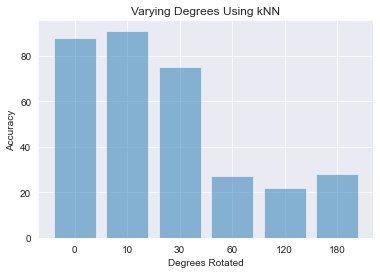

In [24]:
# Objects
objects = degrees

for x in range(len(objects)):
    objects[x] = str(objects[x])


accuracy_results_rotate = np.array(accuracy_results_rotate)
performance = accuracy_results_rotate

plt.bar(objects, performance, alpha=0.5)

plt.ylabel('Accuracy')
plt.xlabel('Degrees Rotated')

# Graph titles
plt.title('Varying Degrees Using kNN')

# Save Degrees kNN graph
plt.savefig('C:/Users/Craig/OneDrive/Advanced AI/CW1/graphs/degreeskNN.png', dpi=300)

plt.show()